<a href="https://colab.research.google.com/github/Oyeshorty/aids_classifyer.ipynb/blob/main/aids_classifyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importing python libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

In [8]:
#importing datasets and printing the head
df=pd.read_csv("AIDS_Classification.csv")
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [9]:
df.shape

(2139, 23)

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
# to continue the EDA, a check for missing values is being conducted
count_nan=df.isnull().sum()
count_nan

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [13]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [16]:
df.dtypes

time          int64
trt           int64
age           int64
wtkg        float64
hemo          int64
homo          int64
drugs         int64
karnof        int64
oprior        int64
z30           int64
preanti       int64
race          int64
gender        int64
str2          int64
strat         int64
symptom       int64
treat         int64
offtrt        int64
cd40          int64
cd420         int64
cd80          int64
cd820         int64
infected      int64
dtype: object

<Axes: >

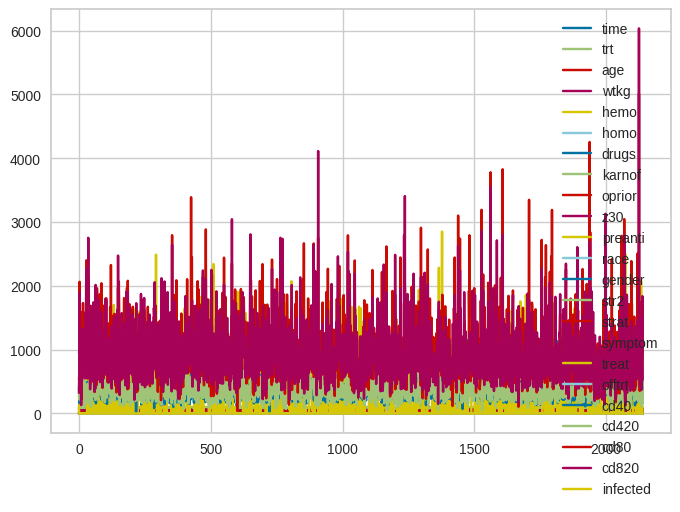

In [15]:
df.plot()

In [17]:
#sns.pairplot(df)

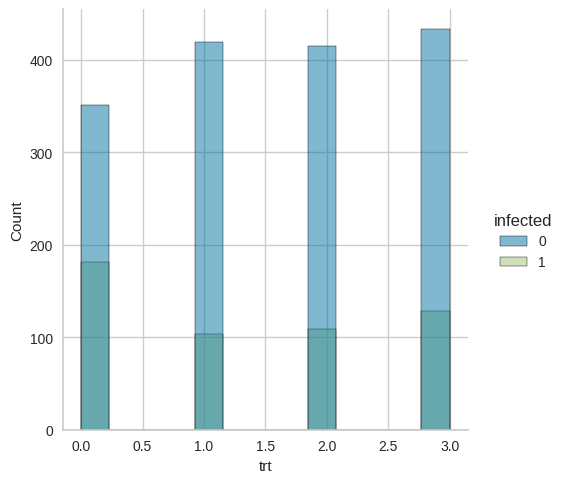

In [29]:
sns.displot(df, x="trt", hue="infected")

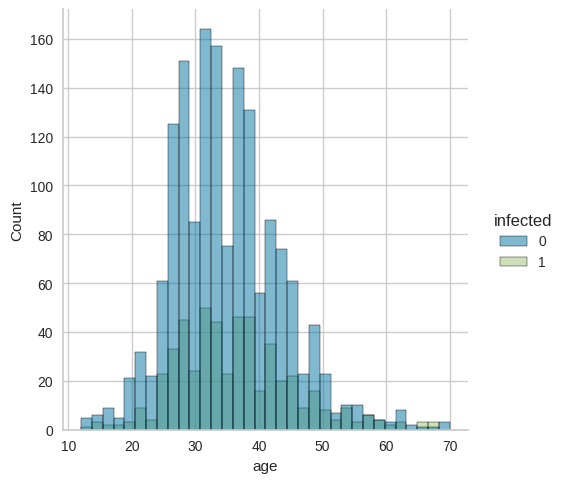

In [32]:
sns.displot(df, x="age", hue="infected")

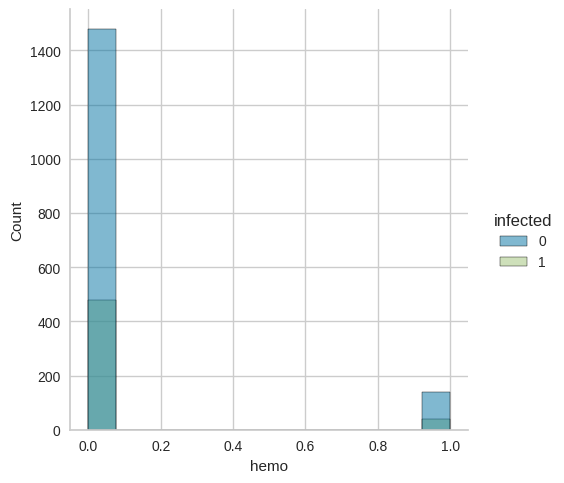

In [31]:
sns.displot(df, x="hemo", hue="infected")

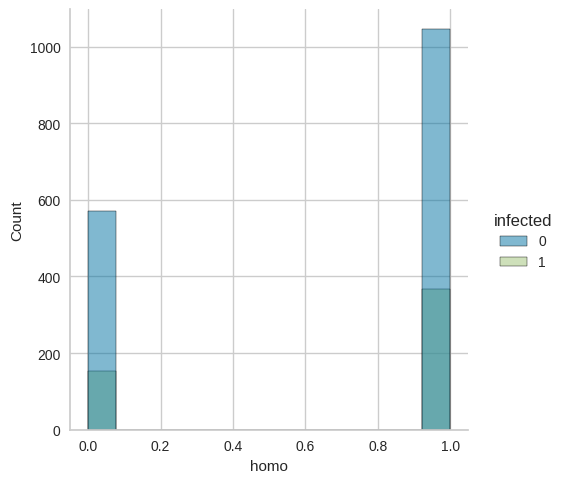

In [33]:
sns.displot(df, x="homo", hue="infected")

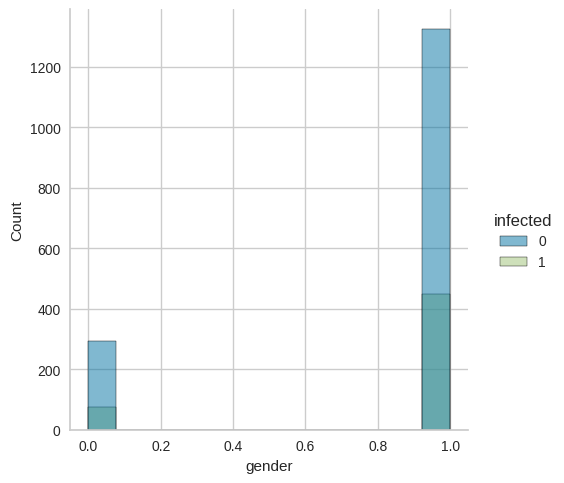

In [35]:
sns.displot(df, x="gender", hue="infected")

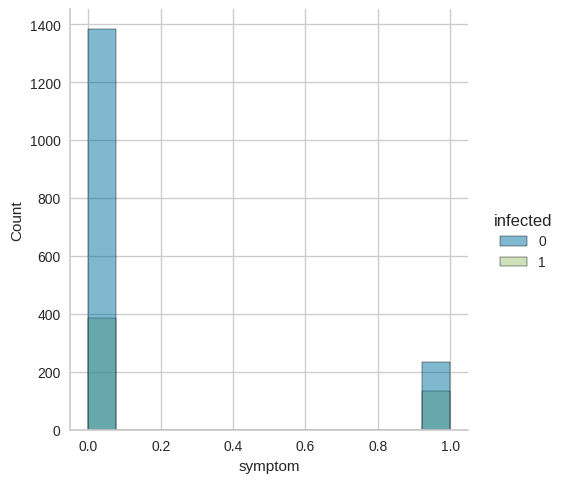

In [36]:
sns.displot(df, x="symptom", hue="infected")

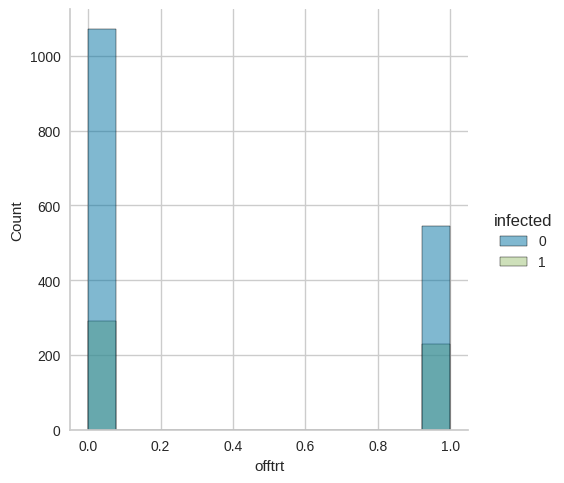

In [37]:
sns.displot(df, x="offtrt", hue="infected")

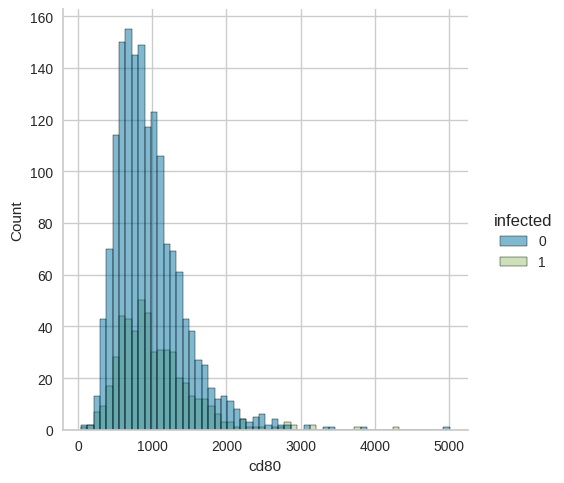

In [38]:
sns.displot(df, x="cd80", hue="infected")

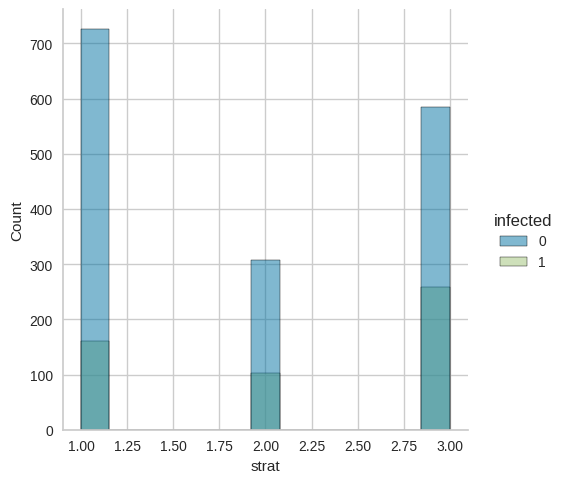

In [39]:
sns.displot(df, x="strat", hue="infected")

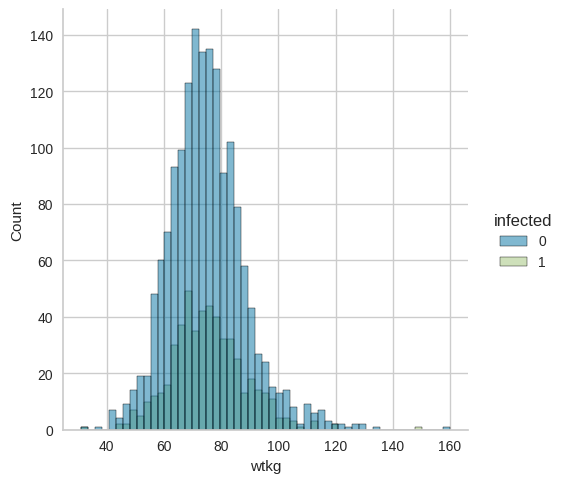

In [40]:
sns.displot(df, x="wtkg", hue="infected")

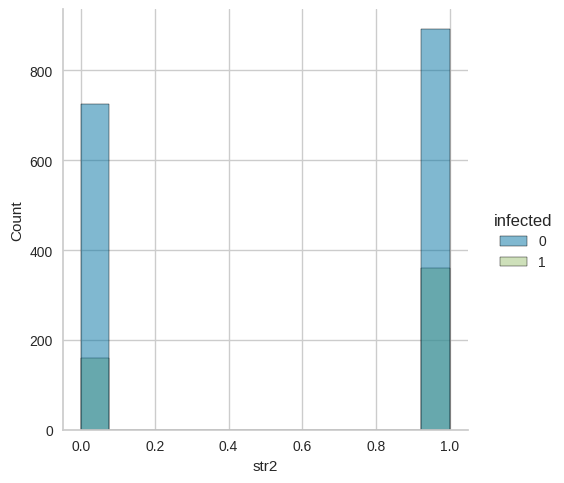

In [41]:
sns.displot(df, x="str2", hue="infected")

In [42]:
# creating features and target variable

X = df [['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',]].values
y = df['infected'].values

In [43]:
# splitting data randomly into 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
# calling decision tree regressor because the taget feature is a numeric variable rather than a categorical variable, which classifies
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier( random_state = 42)
dc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_train_pred = dc.predict(X_train)
y_test_pred = dc.predict(X_test)
dc.score(X_train, y_train)

1.0

In [47]:
dc.score(X_test,y_test)

0.8457943925233645

In [1]:
!pip install pycaret

In [48]:
from pycaret.classification import *

In [49]:
df_algo= setup(df, target ='infected')

,Description,Value
0,Session id,3690
1,Target,infected
2,Target type,Binary
3,Original data shape,"(2139, 23)"
4,Transformed data shape,"(2139, 23)"
5,Transformed train set shape,"(1497, 23)"
6,Transformed test set shape,"(642, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [50]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8938,0.9279,0.6987,0.8424,0.7618,0.6944,0.7009,0.3690
gbc,Gradient Boosting Classifier,0.8918,0.9378,0.7261,0.8163,0.7658,0.6959,0.6999,0.6000
xgboost,Extreme Gradient Boosting,0.8877,0.9328,0.7231,0.8038,0.7585,0.6858,0.6896,0.1630
lightgbm,Light Gradient Boosting Machine,0.8844,0.9360,0.7205,0.7910,0.7521,0.6771,0.6799,0.7330
ada,Ada Boost Classifier,0.8771,0.9301,0.7235,0.7656,0.7413,0.6610,0.6635,0.3220
et,Extra Trees Classifier,0.8751,0.9226,0.5893,0.8555,0.6952,0.6204,0.6390,0.2920
lr,Logistic Regression,0.8610,0.8869,0.5974,0.7835,0.6749,0.5891,0.5996,1.0310
lda,Linear Discriminant Analysis,0.8583,0.8977,0.6360,0.7505,0.6852,0.5951,0.6007,0.0450
ridge,Ridge Classifier,0.8543,0.8977,0.6004,0.7551,0.6649,0.5741,0.5827,0.0430
qda,Quadratic Discriminant Analysis,0.8423,0.8482,0.6056,0.7109,0.6525,0.5514,0.5555,0.0440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [51]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=3690, verbose=0,
                       warm_start=False)


In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Feature Importance')

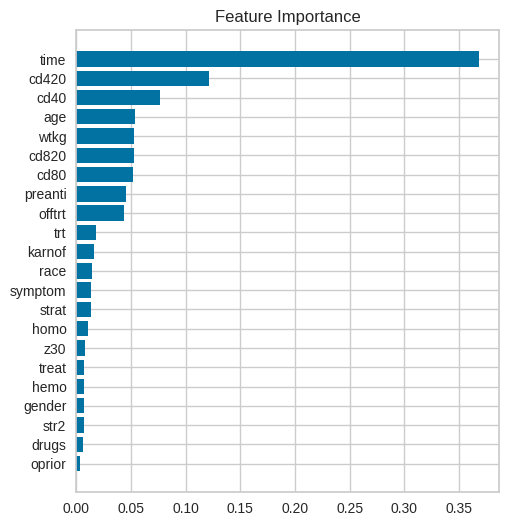

In [55]:
reg = ensemble.RandomForestClassifier()
reg.fit(X_train, y_train)

feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title('Feature Importance')